In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import cvxopt

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'


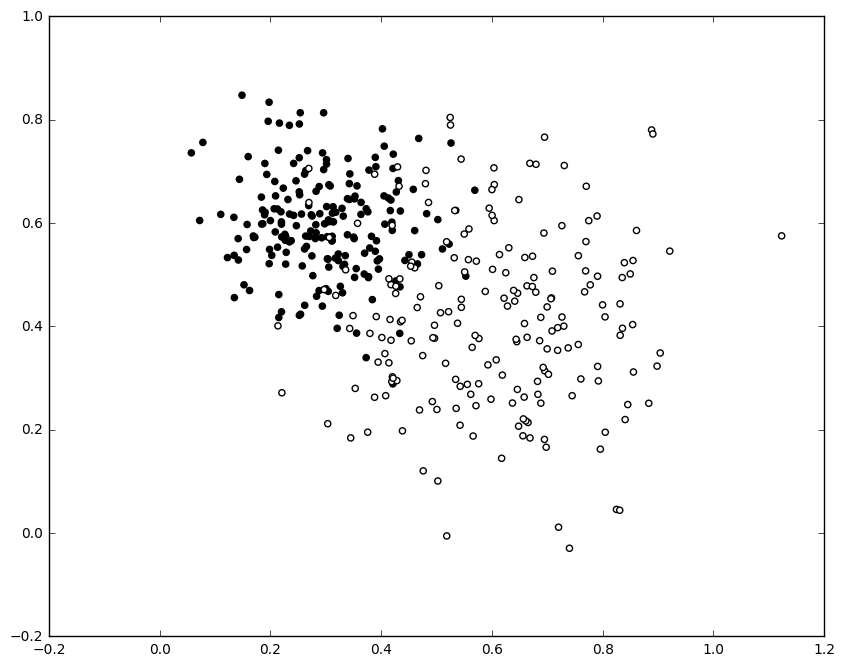

In [9]:
K = 2
N = 200

X = np.vstack((np.random.normal(loc=[0.3, 0.6], scale = 0.1, size = (N, 2)),
               np.random.normal(loc=[0.6, 0.4], scale = 0.15, size = (N, 2))))
y = np.hstack((-1 * np.ones(N), np.ones(N)))

train_test_split = np.array(random.sample(range(N * 2), N))

X_train = X[train_test_split, :]
y_train = y[train_test_split]
    
X_test = X[-train_test_split, :]
y_test = y[-train_test_split]

plt.scatter(X[:, 0], X[:, 1], c = y)

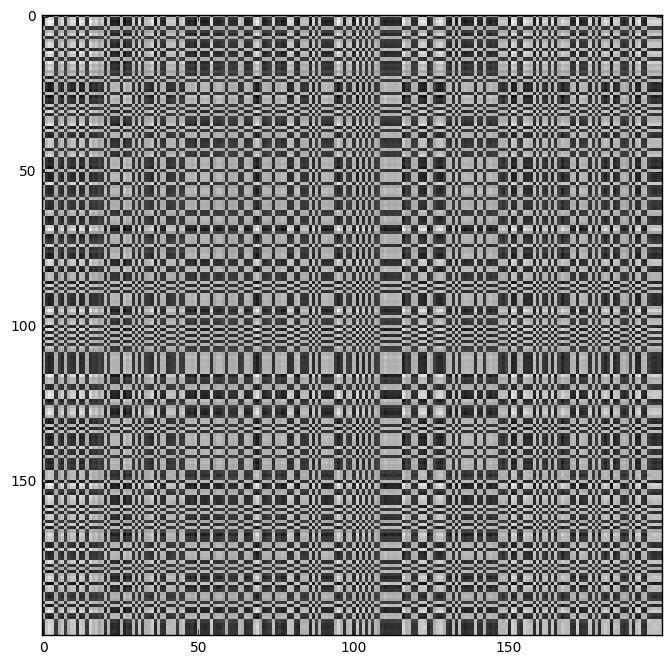

In [10]:
svm_kernel = lambda x, y: (np.dot(x, y) + 1) ** 2
svm_lambda = 0.1

def svm_matrix(X, Y):
    Z = np.zeros((X.shape[0], Y.shape[0]))
    for i in range(X.shape[0]):
        for j in range(Y.shape[0]):
            Z[i, j] = svm_kernel(X[i, :], Y[j, :])
    return Z

X_train_matrix = svm_matrix(X_train, X_train) * np.outer(y_train, y_train)
                                                         
plt.imshow(X_train_matrix)

In [11]:
# minimize 1/2 * x.T * P * x + q.T * x
# subject to G * x < h
#            A * x = b

P = cvxopt.matrix(X_train_matrix)
q = cvxopt.matrix(y_train)
G = cvxopt.matrix(np.eye(N))
h = cvxopt.matrix(np.ones(N) / (2 * N * svm_lambda))
A = cvxopt.matrix(y_train, (1, N))
b = cvxopt.matrix(0.0)

solution = cvxopt.solvers.qp(P, q, G, h, A, b)

c = np.array(solution["x"])


     pcost       dcost       gap    pres   dres
 0:  1.8696e-03 -3.2882e+00  2e+02  1e+01  1e+00
 1:  1.1545e+00 -2.1188e+01  9e+01  5e+00  4e-01
 2:  1.1674e+00 -3.3840e+01  8e+01  5e+00  3e-01
 3:  1.7719e+00 -4.0812e+01  6e+01  2e+00  2e-01
 4:  1.0048e+00 -3.3621e+01  4e+01  1e+00  9e-02
 5:  2.3448e-01 -1.2443e+01  1e+01  4e-01  3e-02
 6:  2.0388e-02 -5.4622e+00  6e+00  1e-01  9e-03
 7:  1.1728e-05 -1.0002e-01  1e-01  2e-03  2e-04
 8:  1.1636e-09 -1.0010e-03  1e-03  2e-05  2e-06
 9: -1.5012e-11 -1.0010e-05  1e-05  2e-07  2e-08
10: -1.7462e-11 -1.0030e-07  1e-07  2e-09  2e-10
11: -1.6203e-11 -1.1875e-09  1e-09  3e-11  2e-12
Optimal solution found.


In [12]:
# TODO: calculate b properly!!!

b = np.sum(c.reshape(-1) * y_train * svm_matrix(X_train, X_train).T, axis = 1)
b = np.mean([np.mean(b[y_train > 0]), np.mean(b[y_train < 0])])

In [13]:
def svm_predict(X):  
    return np.sign(np.sum(c.reshape(-1) * y_train * svm_matrix(X_train, X).T, axis = 1) - b)

print("accuracy on training set =", (svm_predict(X_train) == y_train).mean())
print("accuracy on test set =", (svm_predict(X_test) == y_test).mean())


accuracy on training set = 0.125
accuracy on test set = 0.15


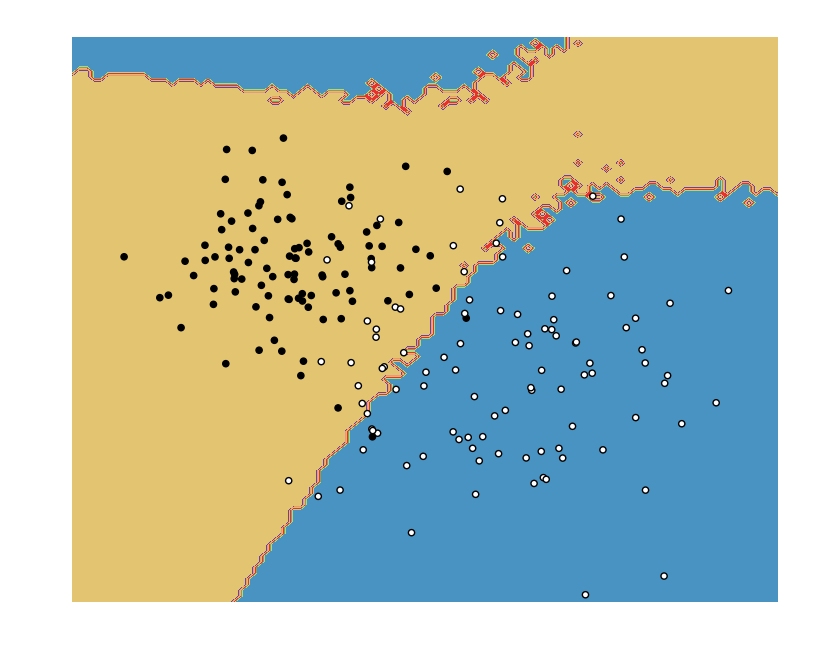

In [15]:
xx, yy = np.meshgrid(np.arange(0, 1, 0.01), np.arange(0, 1, 0.01))
X_boundary = np.c_[xx.ravel(), yy.ravel()]
y_boundary = svm_predict(X_boundary)

plt.contourf(xx, yy, y_boundary.reshape(xx.shape), cmap=plt.cm.Paired)
plt.axis('off')
plt.scatter(X_train[:, 0], X_train[:, 1], c = y_train)